# PeNSE 2009 Microdata Analysis

*   Author: Guilherme Camboim

## Imports and Installations

In [ ]:
# Standard libraries
from datetime import datetime
import re

# NumPy, Pandas and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing and transformation
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler, LabelEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer

# Dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap

# Clustering
from sklearn.cluster import KMeans

# Evaluation metrics
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Distance calculations
from scipy.spatial.distance import cdist

# Statistical analysis
from scipy.stats import spearmanr, kendalltau, anderson, stats, kurtosis, skew

# Association rule mining
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Other utilities
from itertools import combinations
from google.colab import files

In [ ]:
!pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5954 sha256=3d47b4af183cc6fc5d8bbf5aa5b42a659e2032631686e0de1d03d53f934c800e
  Stored in directory: /root/.cache/pip/wheels/77/3d/a6/d317a6fb32be58a602b1e8c6b5d6f31f79322da554cad2a5ea
Successfully built apyori


## Data consuming

In [ ]:
!gdown '1dTV7QMFs6QgBXwf1XQ2Zji0g5ysZQrYW'

Downloading...
From: https://drive.google.com/uc?id=1dTV7QMFs6QgBXwf1XQ2Zji0g5ysZQrYW
To: /content/Base_Pense Completa_2009.txt
100% 19.8M/19.8M [00:00<00:00, 57.8MB/s]


In [ ]:
!gdown '1uOd2No0XSitFe386NzNQsITekEWzr9Wu'

Downloading...
From: https://drive.google.com/uc?id=1uOd2No0XSitFe386NzNQsITekEWzr9Wu
To: /content/Dicionario_PENSE2009_Microdados_Aluno.csv
100% 14.2k/14.2k [00:00<00:00, 23.3MB/s]


In [ ]:
!gdown '1QUKcqn1GQafSPu1EsTGBi8f4X-Z0FxdP'

Downloading...
From: https://drive.google.com/uc?id=1QUKcqn1GQafSPu1EsTGBi8f4X-Z0FxdP
To: /content/Dicionario_PENSE2009_Microdados_Resposta_Alunos.csv
100% 18.9k/18.9k [00:00<00:00, 35.0MB/s]


## Data selection

In [ ]:
colspecs = [
    (0, 4),    # ID
    (4, 5),    # QUESTIONARIO
    (5, 6),    # B00P01
    (6, 7),    # B01P01
    (7, 8),    # B01P02
    (8, 9),    # B01P03
    (9, 11),   # B01P04
    (11, 12),  # B01P05
    (12, 13),  # B01P06
    (13, 14),  # B01P07
    (14, 15),  # B01P08
    (15, 16),  # B01P12
    (16, 17),  # B01P13
    (17, 18),  # B01P14
    (18, 19),  # B01P15
    (19, 20),  # B01P16
    (20, 21),  # B01P17
    (21, 22),  # B01P18
    (22, 23),  # B01P19
    (23, 24),  # B01P20
    (24, 25),  # B01P21
    (25, 26),  # B01P22
    (26, 27),  # B01P23
    (27, 28),  # B01P24
    (28, 29),  # B01P25
    (29, 30),  # B01P26
    (30, 31),  # B02P01
    (31, 32),  # B02P02
    (32, 33),  # B02P03
    (33, 34),  # B02P04
    (34, 35),  # B02P05
    (35, 36),  # B02P06
    (36, 37),  # B02P07
    (37, 38),  # B02P08
    (38, 39),  # B02P09
    (39, 40),  # B02P10
    (40, 41),  # B02P11
    (41, 42),  # B02P12
    (42, 43),  # B02P13
    (43, 44),  # B02P14
    (44, 45),  # B02P15
    (45, 46),  # B02P16
    (46, 47),  # B02P17
    (47, 48),  # B02P18
    (48, 49),  # B02P19
    (49, 50),  # B03P01
    (50, 51),  # B03P02
    (51, 52),  # B03P03
    (52, 53),  # B03P04
    (53, 54),  # B03P05
    (54, 55),  # B03P06
    (55, 57),  # B03P07
    (57, 58),  # B03P08
    (58, 59),  # B03P09
    (59, 60),  # B03P10
    (60, 61),  # B03P11
    (61, 62),  # B03P12
    (62, 63),  # B03P13
    (63, 64),  # B04P01
    (64, 66),  # B04P02
    (66, 67),  # B04P03
    (67, 68),  # B04P04
    (68, 69),  # B04P05
    (69, 70),  # B04P06
    (70, 71),  # B04P07
    (71, 72),  # B04P08
    (72, 73),  # B05P01
    (73, 75),  # B05P02
    (75, 76),  # B05P03
    (76, 77),  # B05P04
    (77, 78),  # B05P05
    (78, 79),  # B05P06
    (79, 80),  # B05P07
    (80, 81),  # B05P08
    (81, 82),  # B05P09
    (82, 83),  # B05P10
    (83, 85),  # B05P11
    (85, 86),  # B06P01
    (86, 87),  # B06P02
    (87, 88),  # B06P03
    (88, 89),  # B06P04
    (89, 90),  # B07P01
    (90, 91),  # B07P02
    (91, 92),  # B07P03
    (92, 93),  # B07P04
    (93, 94),  # B07P05
    (94, 95),  # B07P06
    (95, 96),  # B07P07
    (96, 97),  # B07P08
    (97, 98),  # B07P09
    (98, 99),  # B08P01
    (99, 100), # B08P02
    (100, 101),# B08P03
    (101, 102),# B08P04
    (102, 103),# B08P05
    (103, 104),# B08P06
    (104, 105),# B08P07
    (105, 106),# B08P08
    (106, 107),# B08P09
    (107, 108),# B08P10
    (108, 109),# B09P01
    (109, 110),# B09P02
    (110, 111),# B10P01
    (111, 112),# B10P02
    (112, 113),# B10P03
    (113, 114),# B10P04
    (114, 115),# B11P01
    (115, 121),# Q2B01P01
    (121, 127),# Q2B01P02
    (127, 129),# COD_UF
    (129, 134),# COD_MUNICIPIO
    (134, 143),# DEPEND_ADM
    (143, 149),# ESTALOCA
    (149, 150),# B01P03M
    (150, 151),# TURMA
    (151, 153),# TURMAS
    (153, 155),# MATRIC
    (155, 157),# FREQ
    (157, 159),# PESQ
    (159, 161),# CAPITAL
    (161, 163),# PESQ_CRIT
    (163, 165),# FREQ_CRIT
    (165, 180),# PESO_ESCOLA
    (180, 181),# N_TURMAS
    (181, 191),# PROBSELTURMA
    (191, 206),# PESO_TURMA
    (206, 208),# PART
    (208, 210),# N_PART
    (210, 212),# SEXO
    (212, 227),# PESO_AJU_FREQ
    (227, 242),# PESO_AJU_SEXO
    (242, 243),# DEP2
    (243, 244),# GR_IDADE
    (244, 245),# INST_MAE
    (245, 246),# FRUTA
    (246, 247),# PARENTAL
    (247, 248),# COME_RESP
    (248, 249),# RESP_SABE
    (249, 250),# RESP_FUMO
    (250, 251),# FALTA_AULA
    (251, 252),# AGRESSAO
    (252, 253),# COMEU_FEIJAO
    (253, 254),# COMEU_FRUTA
    (254, 255),# COMEU_GULOS
    (255, 256),# BEBEU_REFRI
    (256, 257),# TV
    (257, 258),# PC
    (258, 259),# EXPCIG
    (259, 260),# FUMAREG
    (260, 261),# EXPALC
    (261, 262),# BEBEREG
    (262, 263),# EMBRIAGUEZ
    (263, 264),# EXPDRO
    (264, 265),# EXPSEX
    (265, 266),# AULASEF
    (266, 267),# BULLYING
    (267, 268),# PRESERV
    (268, 269),# SEGTRAJ
    (269, 270),# SEGESC
    (270, 271),# SENTINSEG
    (271, 272),# CINTO
    (272, 273),# DIRIGIU
    (273, 274),# MOTALCOOL
    (274, 275),# ESCOVA
    (275, 276),# DORDENTE
    (276, 277),# IMAGEM
    (277, 278),# PRODPESO
    (278, 279),# FEIJAO
    (279, 280),# BATATA
    (280, 281),# SALG
    (281, 282),# HAMB
    (282, 283),# LEGU
    (283, 284),# SALADA
    (284, 285),# LEGUC
    (285, 286),# BISCSALG
    (286, 287),# BISCDOCE
    (287, 288),# GULO
    (288, 289),# FRUFRE
    (289, 290),# LEITE
    (290, 291),# REFRI
    (291, 295),# TEMPATIV
    (295, 296),# ESCORATI
    (296, 302),# Q2B01P01I
    (302, 308),# Q2B01P02I
    (308, 309),# DEF_ALT
    (309, 310),# DEF_PES
    (310, 311) # EXC_PES
]

columns = [
    "ID", "QUESTIONARIO", "B00P01", "B01P01", "B01P02", "B01P03", "B01P04", "B01P05", "B01P06", "B01P07", "B01P08",
    "B01P12", "B01P13", "B01P14", "B01P15", "B01P16", "B01P17", "B01P18", "B01P19", "B01P20", "B01P21", "B01P22",
    "B01P23", "B01P24", "B01P25", "B01P26", "B02P01", "B02P02", "B02P03", "B02P04", "B02P05", "B02P06", "B02P07",
    "B02P08", "B02P09", "B02P10", "B02P11", "B02P12", "B02P13", "B02P14", "B02P15", "B02P16", "B02P17", "B02P18",
    "B02P19", "B03P01", "B03P02", "B03P03", "B03P04", "B03P05", "B03P06", "B03P07", "B03P08", "B03P09", "B03P10",
    "B03P11", "B03P12", "B03P13", "B04P01", "B04P02", "B04P03", "B04P04", "B04P05", "B04P06", "B04P07", "B04P08",
    "B05P01", "B05P02", "B05P03", "B05P04", "B05P05", "B05P06", "B05P07", "B05P08", "B05P09", "B05P10", "B05P11",
    "B06P01", "B06P02", "B06P03", "B06P04", "B07P01", "B07P02", "B07P03", "B07P04", "B07P05", "B07P06", "B07P07",
    "B07P08", "B07P09", "B08P01", "B08P02", "B08P03", "B08P04", "B08P05", "B08P06", "B08P07", "B08P08", "B08P09",
    "B08P10", "B09P01", "B09P02", "B10P01", "B10P02", "B10P03", "B10P04", "B11P01", "Q2B01P01", "Q2B01P02",
    "COD_UF", "COD_MUNICIPIO", "DEPEND_ADM", "ESTALOCA", "B01P03M", "TURMA", "TURMAS", "MATRIC", "FREQ", "PESQ",
    "CAPITAL", "PESQ_CRIT", "FREQ_CRIT", "PESO_ESCOLA", "N_TURMAS", "PROBSELTURMA", "PESO_TURMA", "PART", "N_PART",
    "SEXO", "PESO_AJU_FREQ", "PESO_AJU_SEXO", "DEP2", "GR_IDADE", "INST_MAE", "FRUTA", "PARENTAL", "COME_RESP",
    "RESP_SABE", "RESP_FUMO", "FALTA_AULA", "AGRESSAO", "COMEU_FEIJAO", "COMEU_FRUTA", "COMEU_GULOS", "BEBEU_REFRI",
    "TV", "PC", "EXPCIG", "FUMAREG", "EXPALC", "BEBEREG", "EMBRIAGUEZ", "EXPDRO", "EXPSEX", "AULASEF", "BULLYING",
    "PRESERV", "SEGTRAJ", "SEGESC", "SENTINSEG", "CINTO", "DIRIGIU", "MOTALCOOL", "ESCOVA", "DORDENTE", "IMAGEM",
    "PRODPESO", "FEIJAO", "BATATA", "SALG", "HAMB", "LEGU", "SALADA", "LEGUC", "BISCSALG", "BISCDOCE", "GULO",
    "FRUFRE", "LEITE", "REFRI", "TEMPATIV", "ESCORATI", "Q2B01P01I", "Q2B01P02I", "DEF_ALT", "DEF_PES", "EXC_PES"
]

df = pd.read_fwf('/content/Base_Pense Completa_2009.txt', colspecs=colspecs, names=columns)

print(df.head())

   ID  QUESTIONARIO  B00P01 B01P01 B01P02 B01P03 B01P04 B01P05 B01P06 B01P07  \
0   1             1       1      1      3      5      9      5      1      1   
1   1             1       1      2      1      6      1      5      1      1   
2   1             1       1      2      4      3     10      7      1      2   
3   1             1       1      2      3      4      1      7      1      1   
4   1             1       1      .      3      4     10      6      1      .   

   ... FRUFRE LEITE REFRI TEMPATIV ESCORATI Q2B01P01I Q2B01P02I DEF_ALT  \
0  ...      3     2     3      240        3     52.90    169.40       2   
1  ...      1     1     5      250        3     48.30    158.60       2   
2  ...      4     2     3       25        2     49.30    161.40       2   
3  ...      6     .     6      230        3     62.20    159.80       2   
4  ...      1     1     4        .        .         .         .       .   

  DEF_PES EXC_PES  
0       2       2  
1       2       2  
2       

In [ ]:
df = df.drop(columns=[
"B00P01",
"B01P03",
"B01P04",
"B01P05",
"CAPITAL",
"ID",
"QUESTIONARIO",
"COD_MUNICIPIO",
"ESTALOCA",
"B01P03M",
"TURMA",
"TURMAS",
"MATRIC",
"FREQ",
"PESQ",
"PESQ_CRIT",
"FREQ_CRIT",
"PESO_ESCOLA",
"N_TURMAS",
"PROBSELTURMA",
"PESO_TURMA",
"PART",
"N_PART",
"SEXO",
"PESO_AJU_FREQ",
"PESO_AJU_SEXO",
"DEP2",
"GR_IDADE",
"INST_MAE",
"FRUTA",
"PARENTAL",
"COME_RESP",
"RESP_SABE",
"RESP_FUMO",
"FALTA_AULA",
"AGRESSAO",
"COMEU_FEIJAO",
"COMEU_FRUTA",
"COMEU_GULOS",
"BEBEU_REFRI",
"TV",
"PC",
"EXPCIG",
"FUMAREG",
"EXPALC",
"BEBEREG",
"EMBRIAGUEZ",
"EXPDRO",
"EXPSEX",
"AULASEF",
"BULLYING",
"PRESERV",
"SEGTRAJ",
"SEGESC",
"SENTINSEG",
"CINTO",
"DIRIGIU",
"MOTALCOOL",
"ESCOVA",
"DORDENTE",
"IMAGEM",
"PRODPESO",
"FEIJAO",
"BATATA",
"SALG",
"HAMB",
"LEGU",
"SALADA",
"LEGUC",
"BISCSALG",
"BISCDOCE",
"GULO",
"FRUFRE",
"LEITE",
"REFRI",
"ESCORATI",
"Q2B01P01",
"Q2B01P02",
"Q2B01P01I",
"Q2B01P02I",
"DEF_ALT",
"DEF_PES",
"EXC_PES"])

In [ ]:
df_dictionary = pd.read_csv('/content/Dicionario_PENSE2009_Microdados_Aluno.csv', delimiter=';')
dict_mapper_code_description = df_dictionary.set_index('Código')['Descrição'].to_dict()

In [ ]:
df_answers = pd.read_csv('/content/Dicionario_PENSE2009_Microdados_Resposta_Alunos.csv', delimiter=',')

## Exploratory analysis


In [ ]:
df.head(3)

,B01P01,B01P02,B01P06,B01P07,B01P08,B01P12,B01P13,B01P14,B01P15,B01P16,...,B09P01,B09P02,B10P01,B10P02,B10P03,B10P04,B11P01,COD_UF,DEPEND_ADM,TEMPATIV
0,1,3,1,1,2,1,1,1,2,1,...,3,1,3,1,2,2,3,50,ESTADUAL,240
1,2,1,1,1,2,1,1,.,2,2,...,3,1,2,3,2,2,1,50,ESTADUAL,250
2,2,4,1,2,5,1,1,1,2,1,...,3,2,3,4,2,2,1,50,ESTADUAL,25


In [ ]:
df.tail(3)

,B01P01,B01P02,B01P06,B01P07,B01P08,B01P12,B01P13,B01P14,B01P15,B01P16,...,B09P01,B09P02,B10P01,B10P02,B10P03,B10P04,B11P01,COD_UF,DEPEND_ADM,TEMPATIV
63408,2,3,1,1,6,1,1,1,1,1,...,5,2,3,2,2,2,1,26,PRIVADA,10
63409,1,1,1,2,6,1,1,1,1,1,...,3,2,2,1,2,2,2,26,PRIVADA,495
63410,1,2,1,1,7,1,1,1,1,2,...,5,2,3,3,2,2,2,26,PRIVADA,605


In [ ]:
print(df.dtypes)

B01P01        object
B01P02        object
B01P06        object
B01P07        object
B01P08        object
               ...  
B10P04        object
B11P01        object
COD_UF         int64
DEPEND_ADM    object
TEMPATIV      object
Length: 104, dtype: object


In [ ]:
print(df.shape)

(63411, 104)


In [ ]:
# Count: Number of non-zero values.
# Mean: Average value of the data.
# Standard deviation (std): Measure of the dispersion of the data in relation to the mean.
# Minimum (min): Minimum value found.
# 25% (25%): First quartile, that is, the value below which 25% of the data falls.
# Median (50%): The central value that divides the data into two halves.
# 75% (75%): Third quartile, where 75% of the data falls below this value.
# Maximum (max): Maximum value found.

pd.set_option('display.precision', 2)
df.describe()

,COD_UF
count,63411.00
mean,29.88
std,12.78
min,11.00
25%,21.00
50%,28.00
75%,41.00
max,53.00


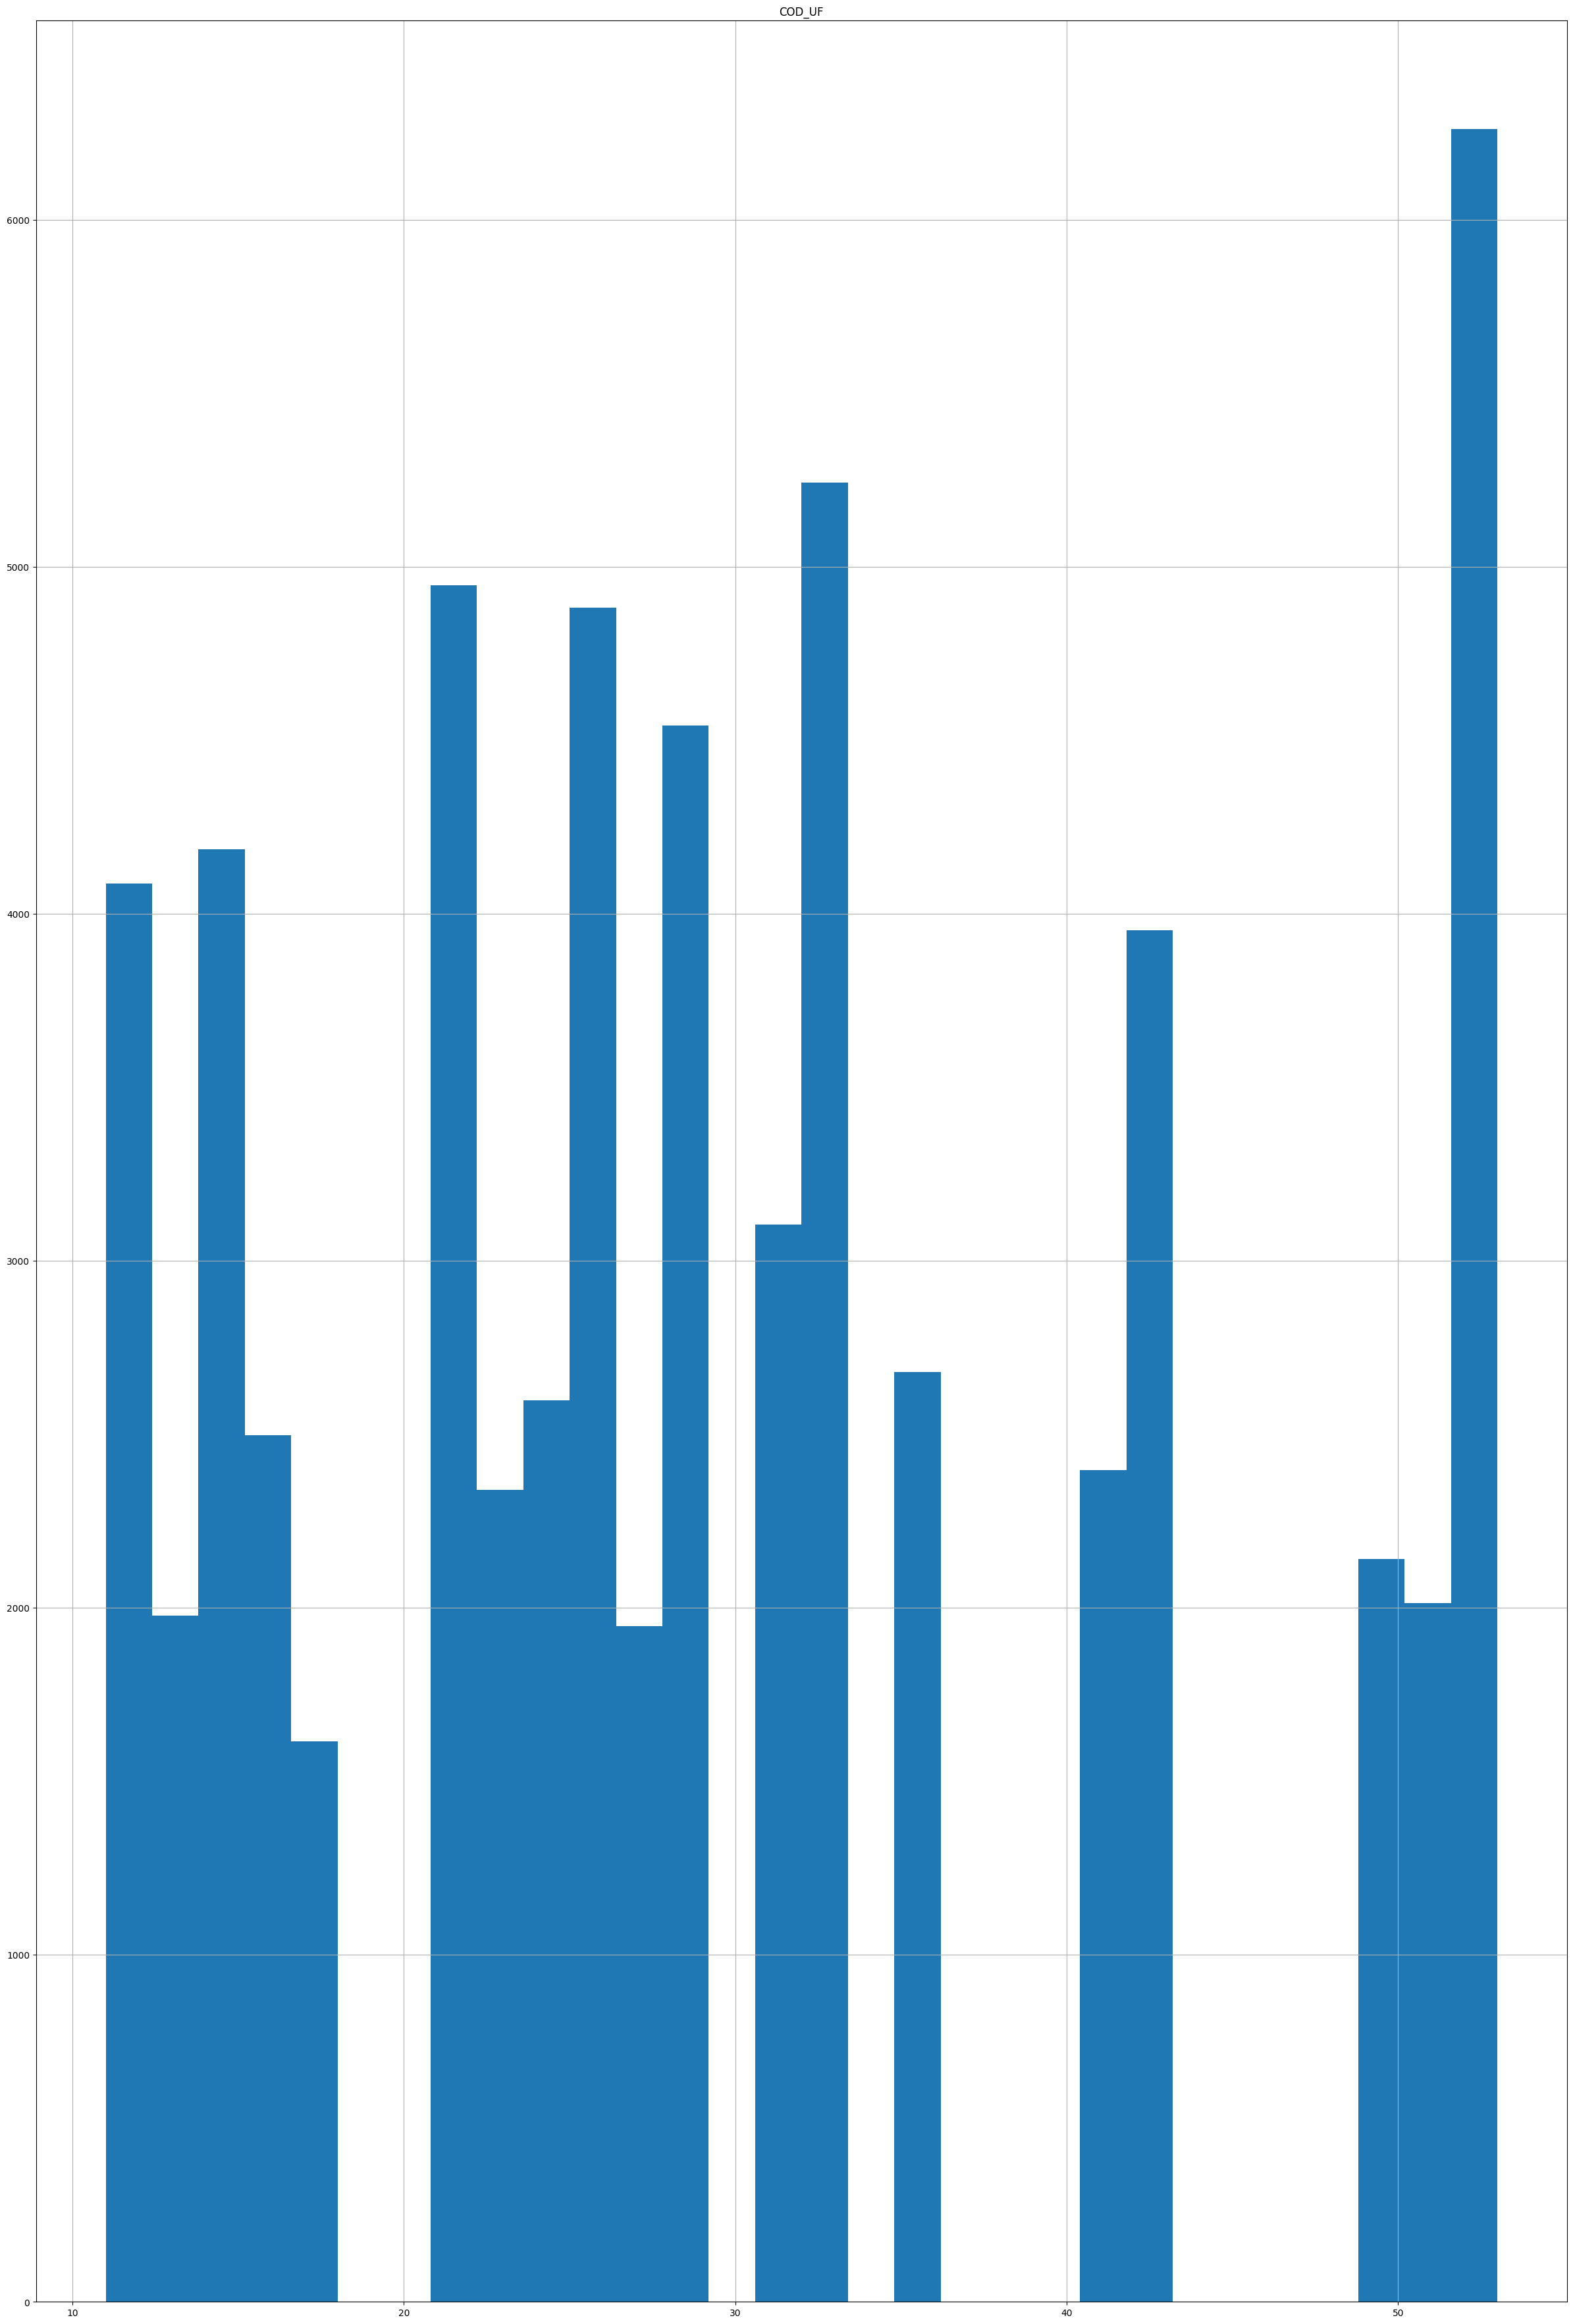

In [ ]:
df.hist(figsize=(30,45),bins=30)
plt.show()

## Preprocessing


In [ ]:
duplicated = df.duplicated().sum()
print(f"\nTotal duplicate values: {duplicated}")


Total duplicate values: 377


In [ ]:
df = df.drop_duplicates()

In [ ]:
duplicated = df.duplicated().sum()
print(f"\nTotal duplicate values after drop: {duplicated}")


Total duplicate values after drop: 0


In [ ]:
missing = df.isna().sum().sum()
print(f"\nTotal missing values: {missing}")


Total missing values: 0


In [ ]:
adminstration_mapper = {
    'ESTADUAL': 1,
    'MUNICIPAL': 2,
    'PRIVADA': 3
}

df['DEPEND_ADM'] = df['DEPEND_ADM'].map(adminstration_mapper).fillna(-1)

In [ ]:
print(f"\nTotal missing values: {df.isna().sum().sum()}")


Total missing values: 0


In [ ]:
df = df.replace('.', -1)
df = df.astype(int)

Normalizing data amenable to normalization

In [ ]:
normalizer = Normalizer()

columns_to_normalize = ['TEMPATIV']

df[columns_to_normalize] = df[columns_to_normalize].replace(-1, np.nan)

imputer = SimpleImputer(strategy='mean')

df[columns_to_normalize] = imputer.fit_transform(df[columns_to_normalize])

df[columns_to_normalize] = normalizer.fit_transform(df[columns_to_normalize])
df[columns_to_normalize]

,TEMPATIV
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
63406,1.0
63407,0.0
63408,1.0
63409,1.0


## Defining the size of "k" for Clustering

/tmp/ipython-input-3694179971.py:17: DeprecationWarning: Arrays of 2-dimensional vectors are deprecated. Use arrays of 3-dimensional vectors instead. (deprecated in NumPy 2.0)
  return np.abs(np.cross(b - a, a - pt)) / np.linalg.norm(b - a)
/tmp/ipython-input-3694179971.py:17: DeprecationWarning: Arrays of 2-dimensional vectors are deprecated. Use arrays of 3-dimensional vectors instead. (deprecated in NumPy 2.0)
  return np.abs(np.cross(b - a, a - pt)) / np.linalg.norm(b - a)
/tmp/ipython-input-3694179971.py:17: DeprecationWarning: Arrays of 2-dimensional vectors are deprecated. Use arrays of 3-dimensional vectors instead. (deprecated in NumPy 2.0)
  return np.abs(np.cross(b - a, a - pt)) / np.linalg.norm(b - a)
/tmp/ipython-input-3694179971.py:17: DeprecationWarning: Arrays of 2-dimensional vectors are deprecated. Use arrays of 3-dimensional vectors instead. (deprecated in NumPy 2.0)
  return np.abs(np.cross(b - a, a - pt)) / np.linalg.norm(b - a)
/tmp/ipython-input-3694179971.py:17:

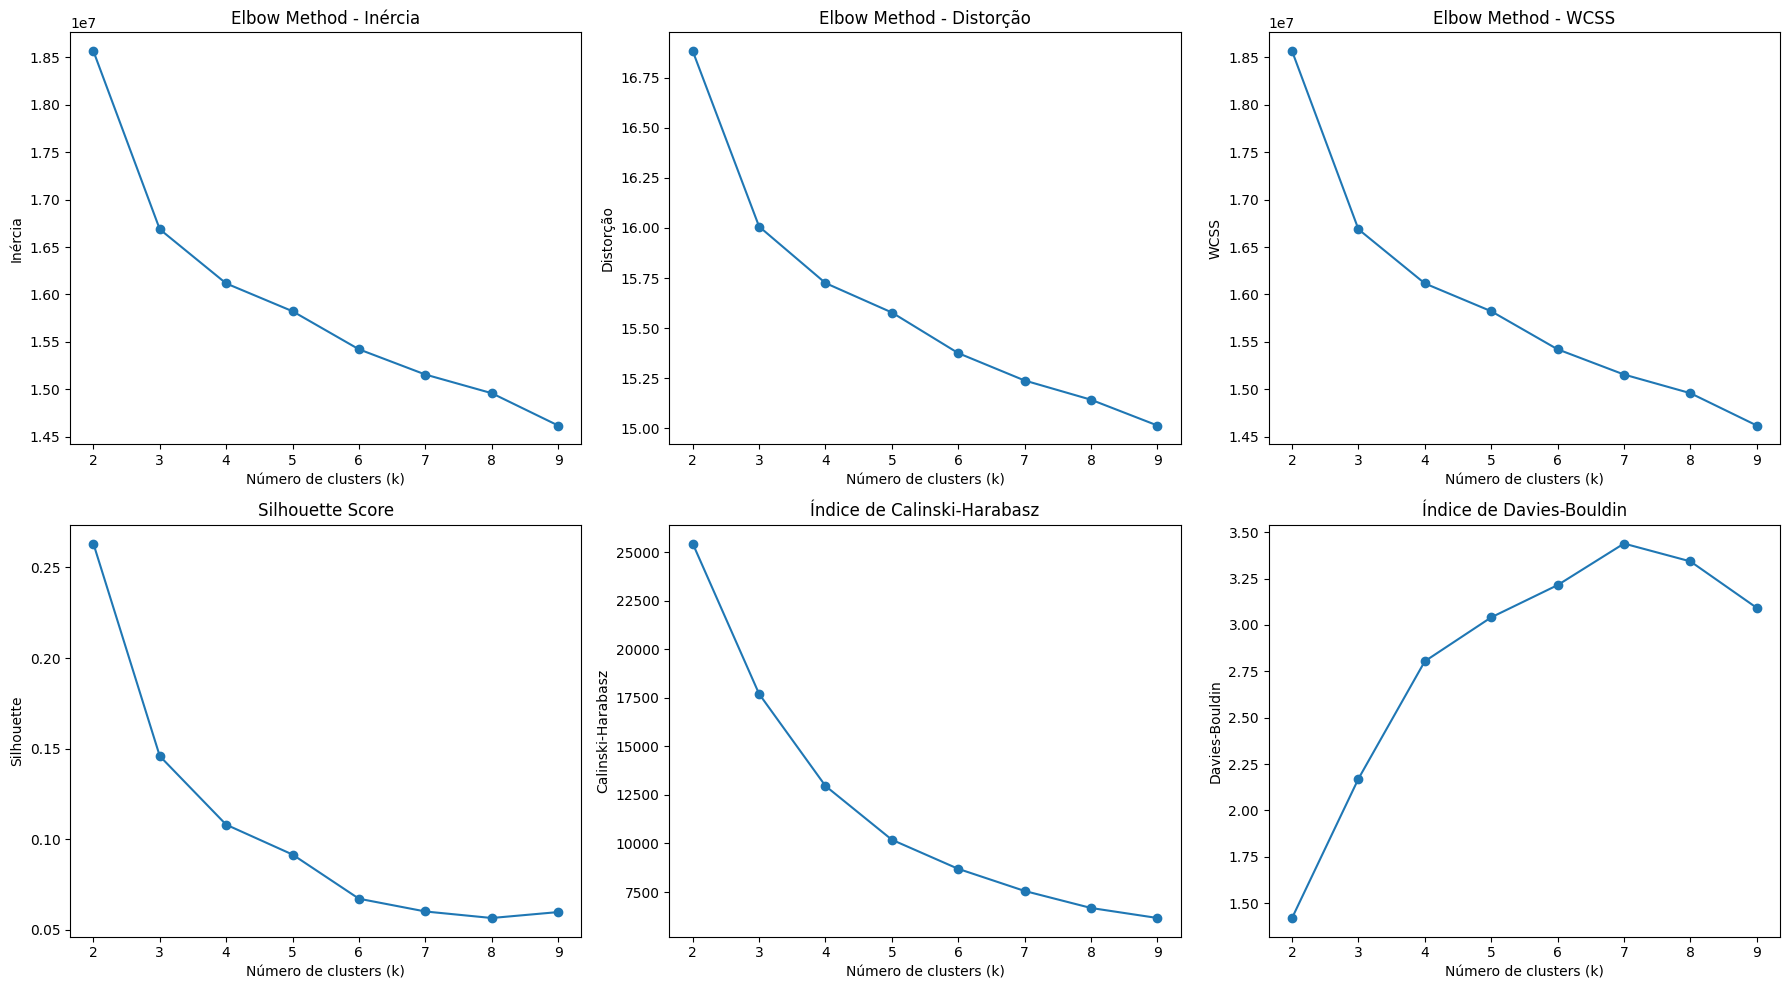

Elbow (inertia) - distância máxima: 4.0, queda percentual: 3
Elbow (WCSS) - distância máxima: 4.0, queda percentual: 3
Elbow (distorção) - distância máxima: 4.0, queda percentual: 3
Melhor k pelo Silhouette Score: 2
Melhor k pelo Calinski-Harabasz Index: 2
Melhor k pelo Davies-Bouldin Index: 2


In [ ]:
def detect_elbow_by_max_distance(x, y):
    x_arr = np.array(x, dtype=float)
    y_arr = np.array(y, dtype=float)

    y_norm = (y_arr - y_arr.min()) / (y_arr.max() - y_arr.min())
    points = np.vstack([x_arr, y_norm]).T
    start = points[0]
    end = points[-1]

    def point_line_distance(pt, a, b):
        return np.abs(np.cross(b - a, a - pt)) / np.linalg.norm(b - a)
    distances = np.array([point_line_distance(p, start, end) for p in points])
    elbow_idx = np.argmax(distances)
    return x_arr[elbow_idx]

def detect_elbow_by_pct_change(x, y):
    y_arr = np.array(y, dtype=float)
    if len(y_arr) < 2:
        return x[0]
    deltas = np.diff(y_arr)
    pct_change = np.abs(deltas / y_arr[:-1])
    best_idx = np.argmax(pct_change) + 1
    return x[best_idx]

inertia = []
distorcao = []
wcss = []
silhouette = []
calinski = []
davies = []

K = list(range(2, 10))

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)

    labels = kmeans.labels_

    inertia.append(kmeans.inertia_)
    dist = np.min(cdist(df, kmeans.cluster_centers_, 'euclidean'), axis=1)
    distorcao.append(np.mean(dist))
    wcss.append(np.sum(dist**2))
    silhouette.append(silhouette_score(df, labels))
    calinski.append(calinski_harabasz_score(df, labels))
    davies.append(davies_bouldin_score(df, labels))

best_k_inertia_elbow = detect_elbow_by_max_distance(K, inertia)
best_k_inertia_pct = detect_elbow_by_pct_change(K, inertia)

best_k_wcss_elbow = detect_elbow_by_max_distance(K, wcss)
best_k_wcss_pct = detect_elbow_by_pct_change(K, wcss)

best_k_distorcao_elbow = detect_elbow_by_max_distance(K, distorcao)
best_k_distorcao_pct = detect_elbow_by_pct_change(K, distorcao)

best_k_silhouette = K[np.argmax(silhouette)]
best_k_calinski = K[np.argmax(calinski)]
best_k_davies = K[np.argmin(davies)]

fig, axs = plt.subplots(2, 3, figsize=(18, 10))

axs[0, 0].plot(K, inertia, marker='o')
axs[0, 0].set_xlabel("Número de clusters (k)")
axs[0, 0].set_ylabel("Inércia")
axs[0, 0].set_title("Elbow Method - Inércia")

axs[0, 1].plot(K, distorcao, marker='o')
axs[0, 1].set_xlabel("Número de clusters (k)")
axs[0, 1].set_ylabel("Distorção")
axs[0, 1].set_title("Elbow Method - Distorção")

axs[0, 2].plot(K, wcss, marker='o')
axs[0, 2].set_xlabel("Número de clusters (k)")
axs[0, 2].set_ylabel("WCSS")
axs[0, 2].set_title("Elbow Method - WCSS")

axs[1, 0].plot(K, silhouette, marker='o')
axs[1, 0].set_xlabel("Número de clusters (k)")
axs[1, 0].set_ylabel("Silhouette")
axs[1, 0].set_title("Silhouette Score")

axs[1, 1].plot(K, calinski, marker='o')
axs[1, 1].set_xlabel("Número de clusters (k)")
axs[1, 1].set_ylabel("Calinski-Harabasz")
axs[1, 1].set_title("Índice de Calinski-Harabasz")

axs[1, 2].plot(K, davies, marker='o')
axs[1, 2].set_xlabel("Número de clusters (k)")
axs[1, 2].set_ylabel("Davies-Bouldin")
axs[1, 2].set_title("Índice de Davies-Bouldin")

plt.tight_layout()
plt.show()

print(f"Elbow (inertia) - distância máxima: {best_k_inertia_elbow}, queda percentual: {best_k_inertia_pct}")
print(f"Elbow (WCSS) - distância máxima: {best_k_wcss_elbow}, queda percentual: {best_k_wcss_pct}")
print(f"Elbow (distorção) - distância máxima: {best_k_distorcao_elbow}, queda percentual: {best_k_distorcao_pct}")
print(f"Melhor k pelo Silhouette Score: {best_k_silhouette}")
print(f"Melhor k pelo Calinski-Harabasz Index: {best_k_calinski}")
print(f"Melhor k pelo Davies-Bouldin Index: {best_k_davies}")

## Clustering

#### k = 3

In [ ]:
kmeans = KMeans(n_clusters=3, n_init=10, max_iter=300, random_state=42)
labels = kmeans.fit_predict(df)

df["cluster"] = labels
df.groupby("cluster").describe()

B01P01                                        B01P02        ...  \
           count  mean   std  min  25%  50%  75%  max    count  mean  ...   
cluster                                                               ...   
0        28050.0  1.47  0.64 -1.0  1.0  2.0  2.0  2.0  28050.0  2.21  ...   
1        18285.0  1.45  0.69 -1.0  1.0  2.0  2.0  2.0  18285.0  2.35  ...   
2        16699.0  1.46  0.64 -1.0  1.0  2.0  2.0  2.0  16699.0  1.95  ...   

        DEPEND_ADM      TEMPATIV                                       
               75%  max    count  mean   std  min  25%  50%  75%  max  
cluster                                                                
0              3.0  3.0  28050.0  0.94  0.23  0.0  1.0  1.0  1.0  1.0  
1              2.0  3.0  18285.0  0.95  0.22  0.0  1.0  1.0  1.0  1.0  
2              2.0  3.0  16699.0  0.97  0.17  0.0  1.0  1.0  1.0  1.0  

[3 rows x 832 columns]

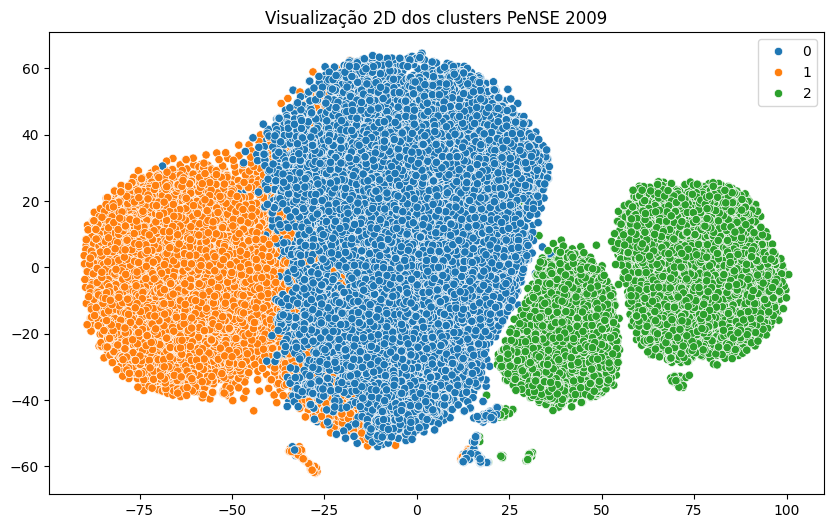

In [ ]:
X = df.values

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=labels, palette='tab10')
plt.title("Visualização 2D dos clusters PeNSE 2009")
plt.show()

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


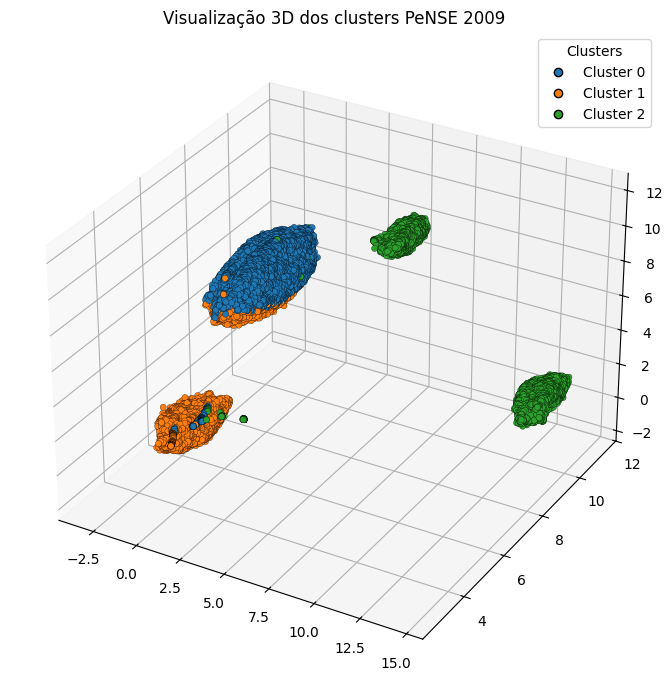

In [ ]:
reducer = umap.UMAP(n_components=3, random_state=42)
X_umap = reducer.fit_transform(df)

color_map = {
    0: '#1f77b4',  # blue
    1: '#ff7f0e',  # orange
    2: '#2ca02c',  # green
}

colors = [color_map[label] for label in labels]

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    X_umap[:, 0], X_umap[:, 1], X_umap[:, 2],
    c=colors,
    s=20,
    alpha=1.0,
    edgecolor='k',
    linewidth=0.2
)

from matplotlib.lines import Line2D
handles = [
    Line2D([0], [0], marker='o', color='w', label=f'Cluster {i}',
           markerfacecolor=color_map[i], markersize=6, markeredgecolor='k')
    for i in sorted(np.unique(labels))
]
ax.legend(handles=handles, title="Clusters")

ax.set_title("Visualização 3D dos clusters PeNSE 2009")
plt.tight_layout()
plt.show()


#### k = 2

In [ ]:
kmeans = KMeans(n_clusters=2, n_init=10, max_iter=300, random_state=42)
labels = kmeans.fit_predict(df)

df["cluster"] = labels
df.groupby("cluster").describe()

B01P01                                        B01P02        ...  \
           count  mean   std  min  25%  50%  75%  max    count  mean  ...   
cluster                                                               ...   
0        16708.0  1.46  0.64 -1.0  1.0  2.0  2.0  2.0  16708.0  1.95  ...   
1        46326.0  1.46  0.66 -1.0  1.0  2.0  2.0  2.0  46326.0  2.27  ...   

        DEPEND_ADM      TEMPATIV                                       
               75%  max    count  mean   std  min  25%  50%  75%  max  
cluster                                                                
0              2.0  3.0  16708.0  1.01  0.81  0.0  0.0  1.0  2.0  2.0  
1              2.0  3.0  46326.0  0.99  0.82  0.0  0.0  1.0  2.0  2.0  

[2 rows x 832 columns]

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


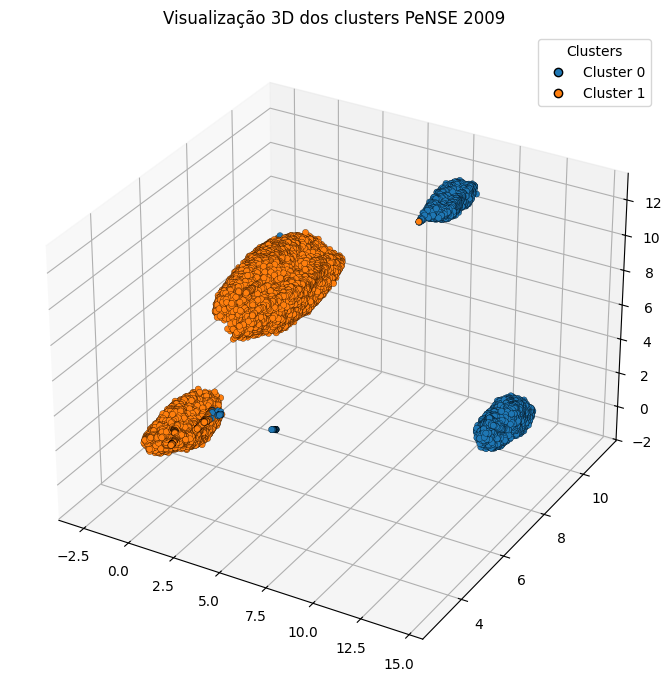

In [ ]:
reducer = umap.UMAP(n_components=3, random_state=42)
X_umap = reducer.fit_transform(df)

color_map = {
    0: '#1f77b4',  # blue
    1: '#ff7f0e',  # orange
}

colors = [color_map[label] for label in labels]

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    X_umap[:, 0], X_umap[:, 1], X_umap[:, 2],
    c=colors,
    s=20,
    alpha=1.0,
    edgecolor='k',
    linewidth=0.2
)

from matplotlib.lines import Line2D
handles = [
    Line2D([0], [0], marker='o', color='w', label=f'Cluster {i}',
           markerfacecolor=color_map[i], markersize=6, markeredgecolor='k')
    for i in sorted(np.unique(labels))
]
ax.legend(handles=handles, title="Clusters")

ax.set_title("Visualização 3D dos clusters PeNSE 2009")
plt.tight_layout()
plt.show()


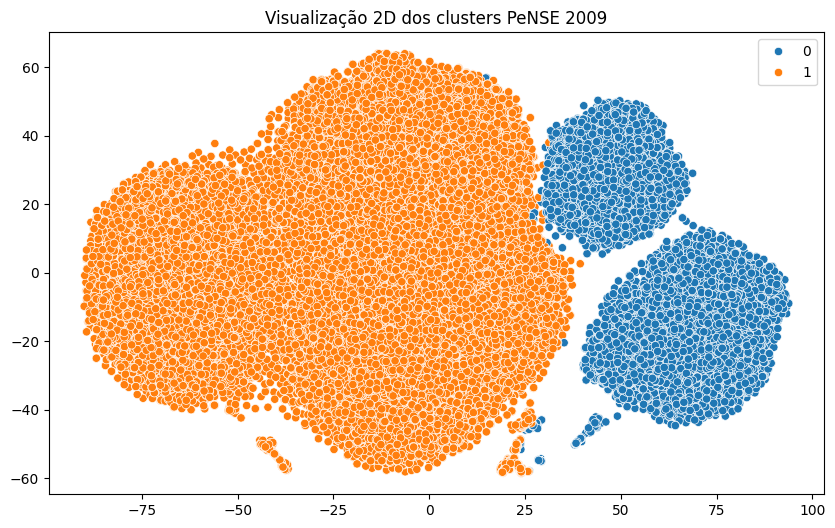

In [ ]:
X = df.values

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=labels, palette='tab10')
plt.title("Visualização 2D dos clusters PeNSE 2009")
plt.show()

## Association rules and Correlation statistics

In [ ]:
adminstrative_type_and_cod_uf_mode = df.groupby('cluster')[['DEPEND_ADM', 'COD_UF']].agg(lambda x: x.mode().iloc[0]).reset_index()
adminstrative_type_and_cod_uf_mode

,cluster,DEPEND_ADM,COD_UF
0,0,1,31
1,1,1,21
2,2,1,52


In [ ]:
administrative_type_and_cod_uf_dictionary = df_answers.query('Variável == "DEPEND_ADM" | Variável == "COD_UF"')
administrative_type_and_cod_uf_dictionary

,Variável,Código,Descrição
549,DEPEND_ADM,1,Estadual
550,DEPEND_ADM,2,Municipal
551,DEPEND_ADM,3,Privada
552,COD_UF,1,Outro
553,COD_UF,11,Rondônia
554,COD_UF,12,Acre
555,COD_UF,13,Amazonas
556,COD_UF,14,Roraima
557,COD_UF,15,Para
558,COD_UF,16,Amapá


#### Apriori algorithm

In [ ]:
noise = np.random.normal(0, 1e-6, size=len(df["TEMPATIV"]))
df["TEMPATIV"] = pd.qcut(df["TEMPATIV"] + noise, q=3, labels=[0, 1, 2]).astype(int)


description_df = df_answers.copy()
description_df = description_df[~description_df['Variável'].isin(["TEMPATIV"])]
description_df['Código'] = description_df['Código'].astype(float)
df_descricoes = description_df.copy()
categoric_df = df.copy()

mapper = {}

for _, row in df_descricoes.iterrows():
    variable = row['Variável']

    try:
        code = int(float(row['Código']))
    except (ValueError, TypeError):
        continue

    description = row['Descrição']

    if variable not in mapper:
        mapper[variable] = {}

    mapper[variable][code] = description

for coluna in categoric_df.columns:
    if coluna in mapper:
        categoric_df[coluna] = categoric_df[coluna].map(mapper[coluna]).fillna(categoric_df[coluna])


time_mapper = {0: 'Baixo', 1: 'Médio', 2: 'Alto'}

categoric_df["TEMPATIV"] = categoric_df["TEMPATIV"].replace(time_mapper)

categoric_df['IDEB'] = categoric_df['cluster'].map({
    0: "Alto",
    1: "Baixo",
    2: "Baixo",
})

categoric_df = categoric_df.rename(columns=dict_mapper_code_description)

/tmp/ipython-input-1479293876.py:37: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  categoric_df['IDEB'] = categoric_df['cluster'].map({


In [ ]:
data = categoric_df.astype(str)
transactions = data.apply(lambda row: [f"{col}={val}" for col, val in row.items()], axis=1).tolist()

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_binario = pd.DataFrame(te_ary, columns=te.columns_)

frequent_itemsets = apriori(
    df_binario,
    min_support=0.25,
    use_colnames=True,
    max_len=2
)

rules = association_rules(
    frequent_itemsets,
    metric='confidence',
    min_threshold=0.75
)

apriori_rules = rules[
    (rules['lift'] > 1.5) &
    (rules['confidence'] > 0.75) &
    (rules['support'] > 0.2) &
    (rules['conviction'] > 1.2)
]

apriori_rules = apriori_rules[
    ~apriori_rules['antecedents'].astype(str).str.contains("pulo do questionário", case=False, na=False) &
    ~apriori_rules['consequents'].astype(str).str.contains("pulo do questionário", case=False, na=False)
]

apriori_rules = apriori_rules.sort_values(by=['lift', 'confidence'], ascending=False)

### Correlational Statistical Analysis

Inserting IDEB values into clusters to analyse correlation with variables

In [ ]:
numeric_df = df.copy()
numeric_df['cluster'] = numeric_df['cluster'].map({
    0: 4.1, # Estadual - Minas Gerais,
    1: 4.0, # Estadual - Goiás,
    2: 3.6,  # Estadual - Maranhão,
})

numeric_df = numeric_df.rename(columns={'cluster': 'IDEB'})

for col in numeric_df.columns:
    if not pd.api.types.is_numeric_dtype(numeric_df[col]) or col == 'IDEB':
        continue

    col_vals = numeric_df[col]

    if 99 in col_vals.values:
        numeric_df.loc[numeric_df[col] == 99, col] = np.nan
    else:
        max_val = col_vals.max()
        if max_val <= 9:
            numeric_df.loc[numeric_df[col] == max_val, col] = np.nan

    if numeric_df[col].isnull().any():
        moda = numeric_df[col].mode(dropna=True)
        if not moda.empty:
            numeric_df[col] = numeric_df[col].fillna(moda[0])

Dividing variables according their distribuition (normal or non normal)

In [ ]:
def assess_normality(series, skew_thresh=0.5, kurtosis_excess_thresh=0.5):
    s = series.dropna()
    if len(s) < 30:
        return {"approx_normal": False, "skew": np.nan, "excess_kurtosis": np.nan, "n": len(s)}
    skew_val  = skew(s)
    excess_kurtosis = kurtosis(s, fisher=True)
    approx_normal = (abs(skew_val ) <= skew_thresh) and (abs(excess_kurtosis) <= kurtosis_excess_thresh)
    return {
        "approx_normal": approx_normal,
        "skew": skew_val,
        "excess_kurtosis": excess_kurtosis,
        "n": len(s)
    }

def identify_normal_columns(df, skew_thresh=0.5, kurtosis_excess_thresh=0.5):
    normal = []
    non_normal = []
    details = {}
    for col in df.select_dtypes(include=[np.number]).columns:
        res = assess_normality(df[col], skew_thresh, kurtosis_excess_thresh)
        details[col] = res
        if res["approx_normal"]:
            normal.append(col)
        else:
            non_normal.append(col)

    if "IDEB" in df.columns:
        if "IDEB" not in normal:
            normal.append("IDEB")
        if "IDEB" not in non_normal:
            non_normal.append("IDEB")
    summary_df = pd.DataFrame.from_dict(details, orient="index")
    return normal, non_normal, summary_df

normal_cols, non_normal_cols, summary_df = identify_normal_columns(numeric_df, skew_thresh=0.7, kurtosis_excess_thresh=1.0)
print("Colunas aproximadamente normais:", normal_cols)
print("Colunas não normais:", non_normal_cols)

Colunas aproximadamente normais: ['B01P02', 'B02P01', 'B02P04', 'B02P08', 'B02P09', 'B02P10', 'B02P11', 'B02P13', 'B02P17', 'B03P03', 'B03P04', 'B03P09', 'B03P11', 'B03P13', 'B10P02', 'B11P01', 'COD_UF', 'IDEB']
Colunas não normais: ['B01P01', 'B01P06', 'B01P07', 'B01P08', 'B01P12', 'B01P13', 'B01P14', 'B01P15', 'B01P16', 'B01P17', 'B01P18', 'B01P19', 'B01P20', 'B01P21', 'B01P22', 'B01P23', 'B01P24', 'B01P25', 'B01P26', 'B02P02', 'B02P03', 'B02P05', 'B02P06', 'B02P07', 'B02P12', 'B02P14', 'B02P15', 'B02P16', 'B02P18', 'B02P19', 'B03P01', 'B03P02', 'B03P05', 'B03P06', 'B03P07', 'B03P08', 'B03P10', 'B03P12', 'B04P01', 'B04P02', 'B04P03', 'B04P04', 'B04P05', 'B04P06', 'B04P07', 'B04P08', 'B05P01', 'B05P02', 'B05P03', 'B05P04', 'B05P05', 'B05P06', 'B05P07', 'B05P08', 'B05P09', 'B05P10', 'B05P11', 'B06P01', 'B06P02', 'B06P03', 'B06P04', 'B07P01', 'B07P02', 'B07P03', 'B07P04', 'B07P05', 'B07P06', 'B07P07', 'B07P08', 'B07P09', 'B08P01', 'B08P02', 'B08P03', 'B08P04', 'B08P05', 'B08P06', 'B08P0

Function to evaluate correlation results

In [ ]:
def interpret_correlation(variable, description, coef):
    abs_coef = abs(coef)
    direction = "positiva" if coef > 0 else "negativa"

    if abs_coef < 0.2:
        intensity = "muito fraca"
    elif abs_coef < 0.4:
        intensity = "fraca"
    elif abs_coef < 0.6:
        intensity = "moderada"
    elif abs_coef < 0.8:
        intensity = "forte"
    else:
        intensity = "muito forte"

    text = (
        f"A variável **{variable}** ({description}) apresenta uma correlação {direction} "
        f"{intensity} ({coef:.2%}) com o IDEB. "
    )

    if coef < 0:
        text += "Isso sugere que quanto maior o valor dessa variável, menor tende a ser o IDEB."
    else:
        text += "Isso sugere que quanto maior o valor dessa variável, maior tende a ser o IDEB."

    return text

#### Pearson

In [ ]:
corr_pearson = numeric_df[normal_cols].corr(method='pearson')
target_var = 'IDEB'

correlation_with_target_pearson = corr_pearson[target_var].drop(labels=[target_var])

ordered_correlations = correlation_with_target_pearson.abs().sort_values(ascending=False)

top_10_indices = ordered_correlations.index[:10]

top_10_pearson_relation = pd.DataFrame({
    'Variável': top_10_indices,
    'Correlação': correlation_with_target_pearson[top_10_indices].values
})

top_10_pearson_relation['Descrição'] = top_10_pearson_relation['Variável'].map(dict_mapper_code_description)

top_10_pearson_relation['Interpretação'] = top_10_pearson_relation.apply(
    lambda row: interpret_correlation(row['Variável'], row['Descrição'], row['Correlação']), axis=1
)

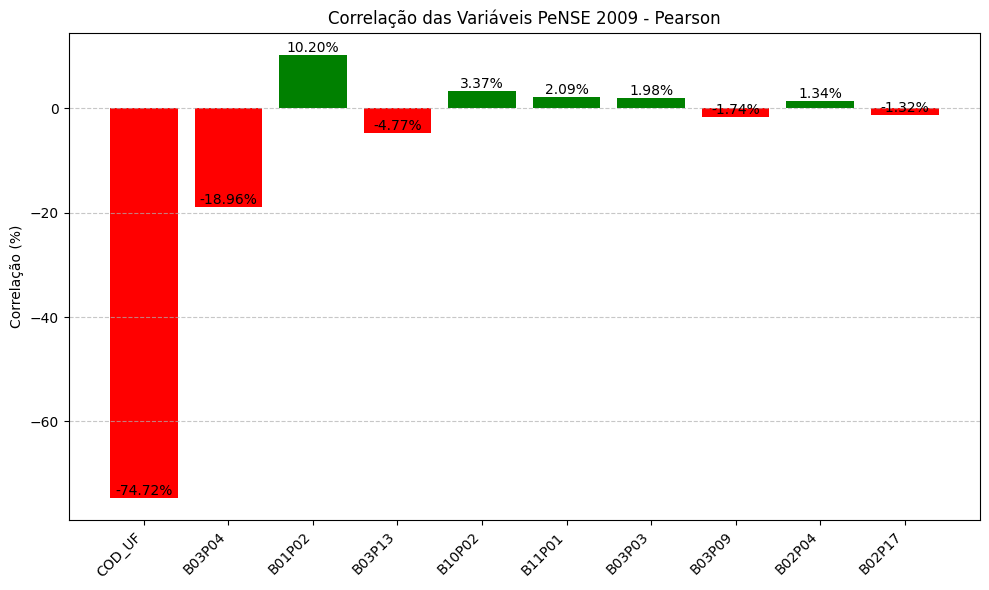

In [ ]:
top_10_pearson_relation_percentage = top_10_pearson_relation["Correlação"] * 100
plt.figure(figsize=(10, 6))
bars = plt.bar(top_10_pearson_relation["Variável"], top_10_pearson_relation_percentage,
               color=["green" if x > 0 else "red" for x in top_10_pearson_relation_percentage])

plt.xticks(rotation=45, ha="right")
plt.ylabel("Correlação (%)")
plt.title("Correlação das Variáveis PeNSE 2009 - Pearson")
plt.grid(axis="y", linestyle="--", alpha=0.7)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f"{height:.2f}%",
             ha="center", va="bottom")

plt.tight_layout()
plt.show()

#### Spearman

In [ ]:
df_encoded = numeric_df.copy()

for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col].astype(str))

cor_spearman = df_encoded[non_normal_cols].corr(method='spearman')
target_var = 'IDEB'

correlation_with_target_spearman = cor_spearman[target_var].drop(labels=[target_var])

correlacoes_ordenadas_spearman = correlation_with_target_spearman.abs().sort_values(ascending=False)

top_10_indices_spearman = correlacoes_ordenadas_spearman.index[:10]

top_10_spearman_relation = pd.DataFrame({
    'Variável': top_10_indices_spearman,
    'Correlação': correlation_with_target_spearman[top_10_indices_spearman].values
})

top_10_spearman_relation['Descrição'] = top_10_spearman_relation['Variável'].map(dict_mapper_code_description)

top_10_spearman_relation['Interpretação'] = top_10_spearman_relation.apply(
    lambda row: interpret_correlation(row['Variável'], row['Descrição'], row['Correlação']), axis=1
)

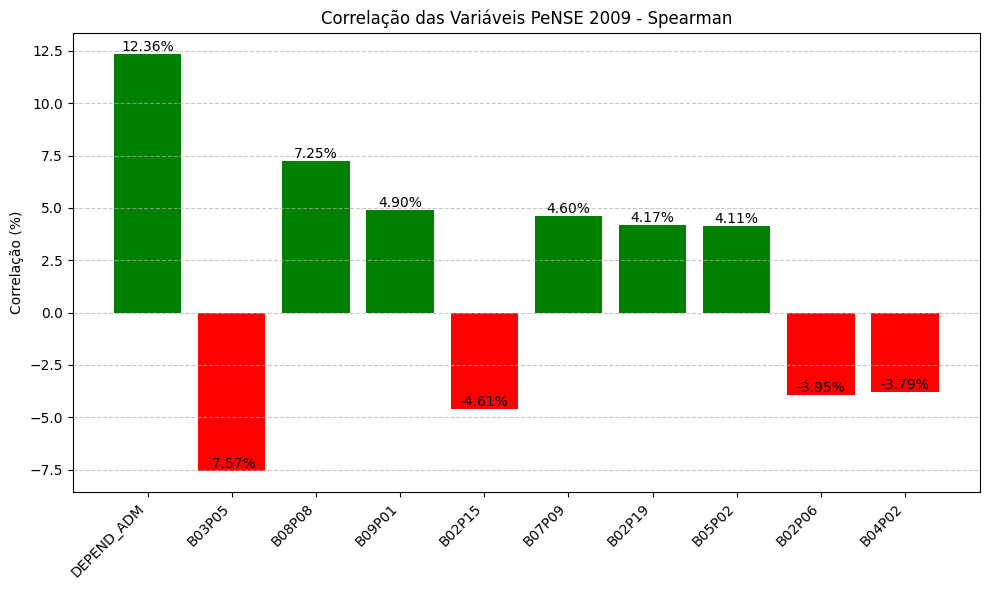

In [ ]:
top_10_spearman_relation_percentage = top_10_spearman_relation["Correlação"] * 100
plt.figure(figsize=(10, 6))
bars = plt.bar(top_10_spearman_relation["Variável"], top_10_spearman_relation_percentage,
               color=["green" if x > 0 else "red" for x in top_10_spearman_relation_percentage])

plt.xticks(rotation=45, ha="right")
plt.ylabel("Correlação (%)")
plt.title("Correlação das Variáveis PeNSE 2009 - Spearman")
plt.grid(axis="y", linestyle="--", alpha=0.7)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f"{height:.2f}%",
             ha="center", va="bottom")

plt.tight_layout()
plt.show()

#### Kendall

In [ ]:
cor_kendall = df_encoded[non_normal_cols].corr(method='kendall')
target_var = 'IDEB'

correlation_with_target_kendall = cor_kendall[target_var].drop(labels=[target_var])

correlacoes_ordenadas_kendall = correlation_with_target_kendall.abs().sort_values(ascending=False)

top_10_indices_kendall = correlacoes_ordenadas_kendall.index[:10]

top_10_kendall_relation = pd.DataFrame({
    'Variável': top_10_indices_kendall,
    'Correlação': correlation_with_target_kendall[top_10_indices_kendall].values
})

top_10_kendall_relation['Descrição'] = top_10_kendall_relation['Variável'].map(dict_mapper_code_description)

top_10_kendall_relation['Interpretação'] = top_10_kendall_relation.apply(
    lambda row: interpret_correlation(row['Variável'], row['Descrição'], row['Correlação']), axis=1
)

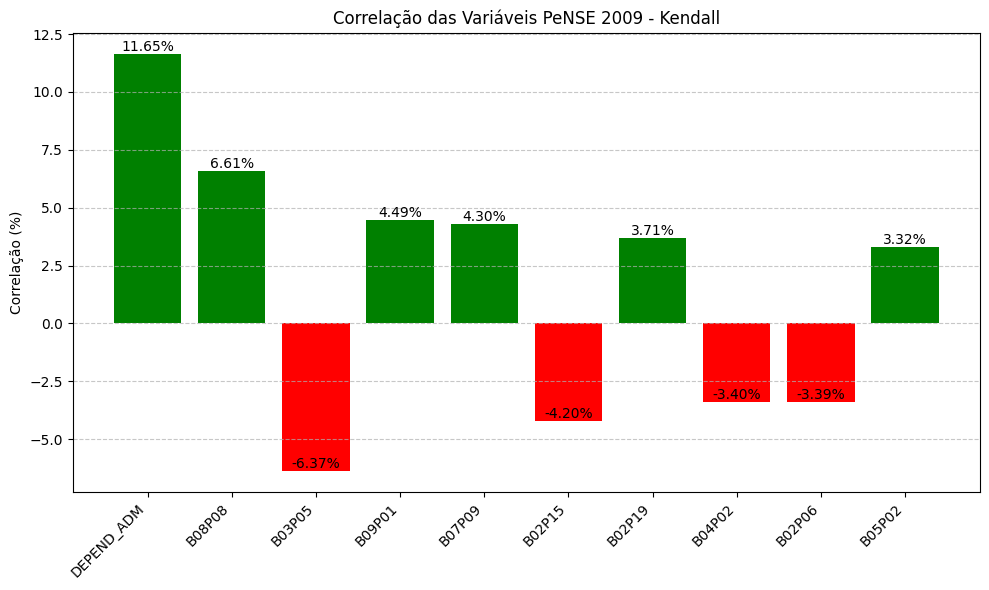

In [ ]:
top_10_kendall_relation_percentage = top_10_kendall_relation["Correlação"] * 100
plt.figure(figsize=(10, 6))
bars = plt.bar(top_10_kendall_relation["Variável"], top_10_kendall_relation_percentage,
               color=["green" if x > 0 else "red" for x in top_10_kendall_relation_percentage])

plt.xticks(rotation=45, ha="right")
plt.ylabel("Correlação (%)")
plt.title("Correlação das Variáveis PeNSE 2009 - Kendall")
plt.grid(axis="y", linestyle="--", alpha=0.7)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f"{height:.2f}%",
             ha="center", va="bottom")

plt.tight_layout()
plt.show()

## Categoric Datasets to Interpret

Creating categorical dataset with variables and answers by cluster

In [ ]:
df_without_negative_values = df.mask(df < 0)

df_with_mode_of_variables = []

for cluster_num in df_without_negative_values['cluster'].unique():
    df_cluster = df_without_negative_values[df_without_negative_values['cluster'] == cluster_num]

    df_cluster_without_negative_values = df_cluster.drop(columns=['cluster'])
    tabela_moda_cluster = pd.DataFrame({
        "Variável": df_cluster_without_negative_values.columns,
        "Valor Mais Frequente": [df_cluster_without_negative_values[col].mode().iloc[0] for col in df_cluster_without_negative_values.columns],
        "Cluster": cluster_num
    })

    df_with_mode_of_variables.append(tabela_moda_cluster)

df_with_mode_of_variables_treated = pd.concat(df_with_mode_of_variables, ignore_index=True)

df_interpretative = pd.merge(df_with_mode_of_variables_treated, df_dictionary, left_on='Variável', right_on='Código', how='left')
df_interpretative = df_interpretative[['Variável','Descrição', 'Valor Mais Frequente', 'Cluster']]
df_interpretative["Valor Mais Frequente"] = df_interpretative["Valor Mais Frequente"].apply(lambda x: str(int(x)) if isinstance(x, (int, float)) and x.is_integer() else str(x))
df_interpretative['CONCAT'] = df_interpretative['Variável'].astype(str) + df_interpretative['Valor Mais Frequente'].astype(str)
df_answers['CONCAT'] = df_answers['Variável'].astype(str) + df_answers['Código'].astype(str)
df_interpretative = df_interpretative.merge(df_answers[["CONCAT", "Descrição"]], on="CONCAT", how="left", suffixes=("", "_t2"))
df_interpretative["Valor Mais Frequente"] = df_interpretative["Descrição_t2"]
df_interpretative.drop(columns=["Descrição_t2"], inplace=True)

Associating IDEB values to dataset

In [ ]:
ideb_map = {
    "Goiás": 4.0, # Total
    "Minas Gerais": 4.1, # Estadual
    "Maranhão": 3.60, # Estadual
}

state_by_cluster = df_interpretative[df_interpretative['Variável'] == 'COD_UF'].set_index('Cluster')['Valor Mais Frequente'].to_dict()

df_interpretative['IDEB'] = df_interpretative['Cluster'].map(state_by_cluster).map(ideb_map)

Creating dataset with only divergent variables

In [ ]:
df_differences_items = df_interpretative.groupby('Variável')['Valor Mais Frequente'].nunique()
variables_with_diference = df_differences_items[df_differences_items > 1].index

df_with_only_different_values_by_varibles = df_interpretative[df_interpretative['Variável'].isin(variables_with_diference)].sort_values(['Variável', 'Cluster'])

## Download Section

Code to download file with clustered dataset, divergent dataset, apyori rules, correlation metrics and variables dictionary

In [ ]:
timestamp = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
filename = f"PeNSE2009_analise_completa_{timestamp}.xlsx"

with pd.ExcelWriter(filename) as writer:
    df_interpretative.to_excel(writer, sheet_name='Clusterizacao_Completa', index=False)
    df_with_only_different_values_by_varibles.to_excel(writer, sheet_name='Diferencas_Clusters', index=False)
    top_10_spearman_relation.to_excel(writer, sheet_name='Spearman', index=False)
    top_10_pearson_relation.to_excel(writer, sheet_name='Pearson', index=False)
    top_10_kendall_relation.to_excel(writer, sheet_name='Kendal', index=False)
    apriori_rules.to_excel(writer, sheet_name='Regras_Associacao', index=False)
    df_answers.to_excel(writer, sheet_name='Dicionario', index=False)

files.download(filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>